In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
sns.set()
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [43]:
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
df.Type.unique()

array([1, 2, 3], dtype=int64)

In [45]:
df.Type.value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [46]:
df['ID']=range(1,179,1)
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [47]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


# Data Preprocessing

In [48]:
df1=df.drop(['Type'],axis=1)
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
 14  ID               178 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 21.0 KB


In [50]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

In [51]:
df.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

# EXPLORATORY DATA ANALYSIS

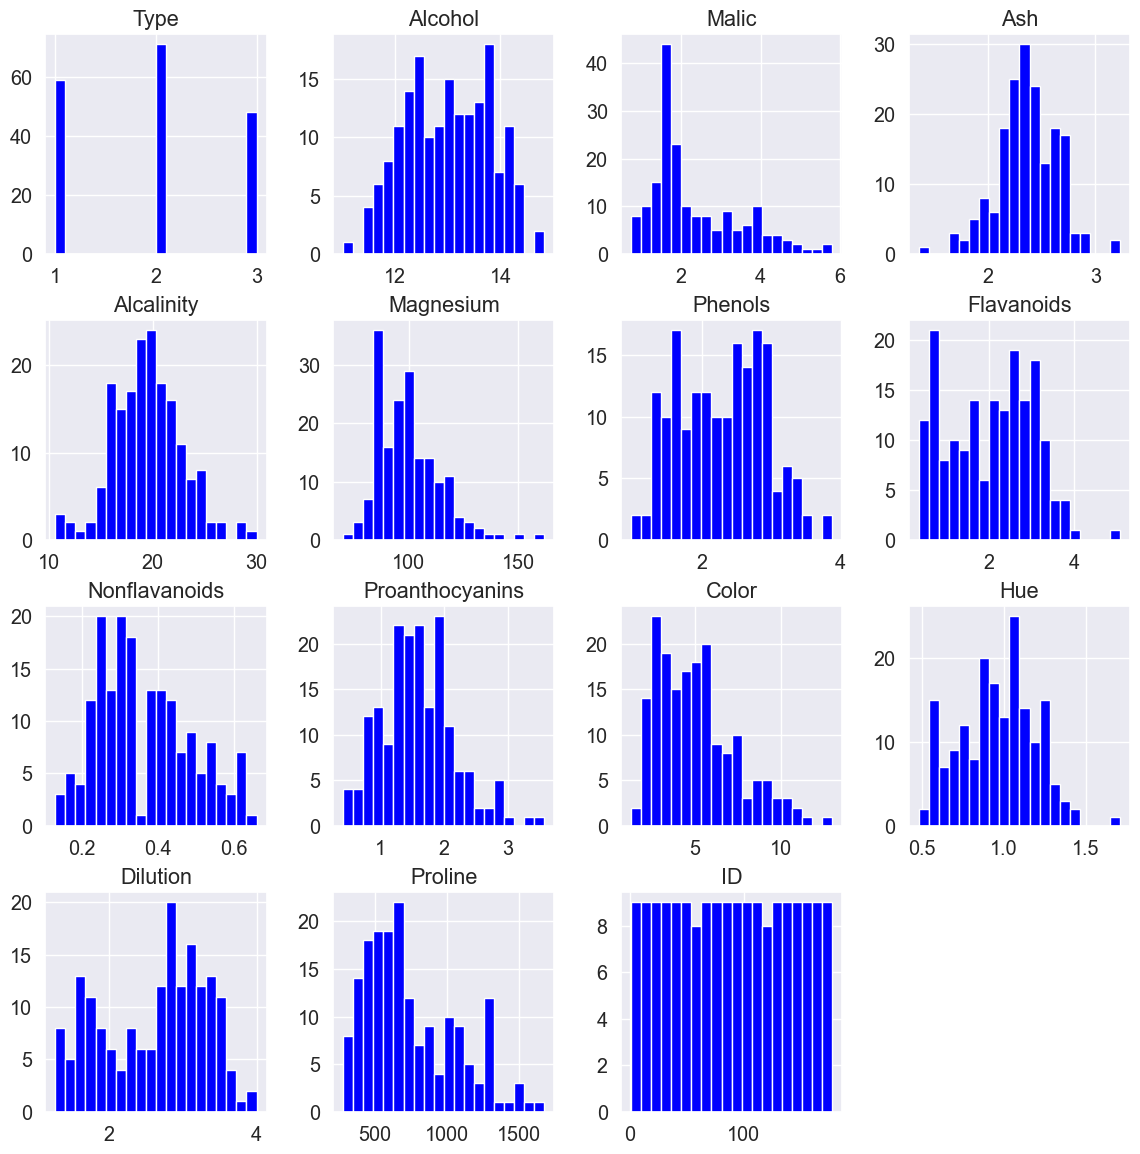

In [52]:
sns.set(style='dark',font_scale=1.3,rc={'figure.figsize':(14,14)})
ax=df.hist(bins=20,color='blue')

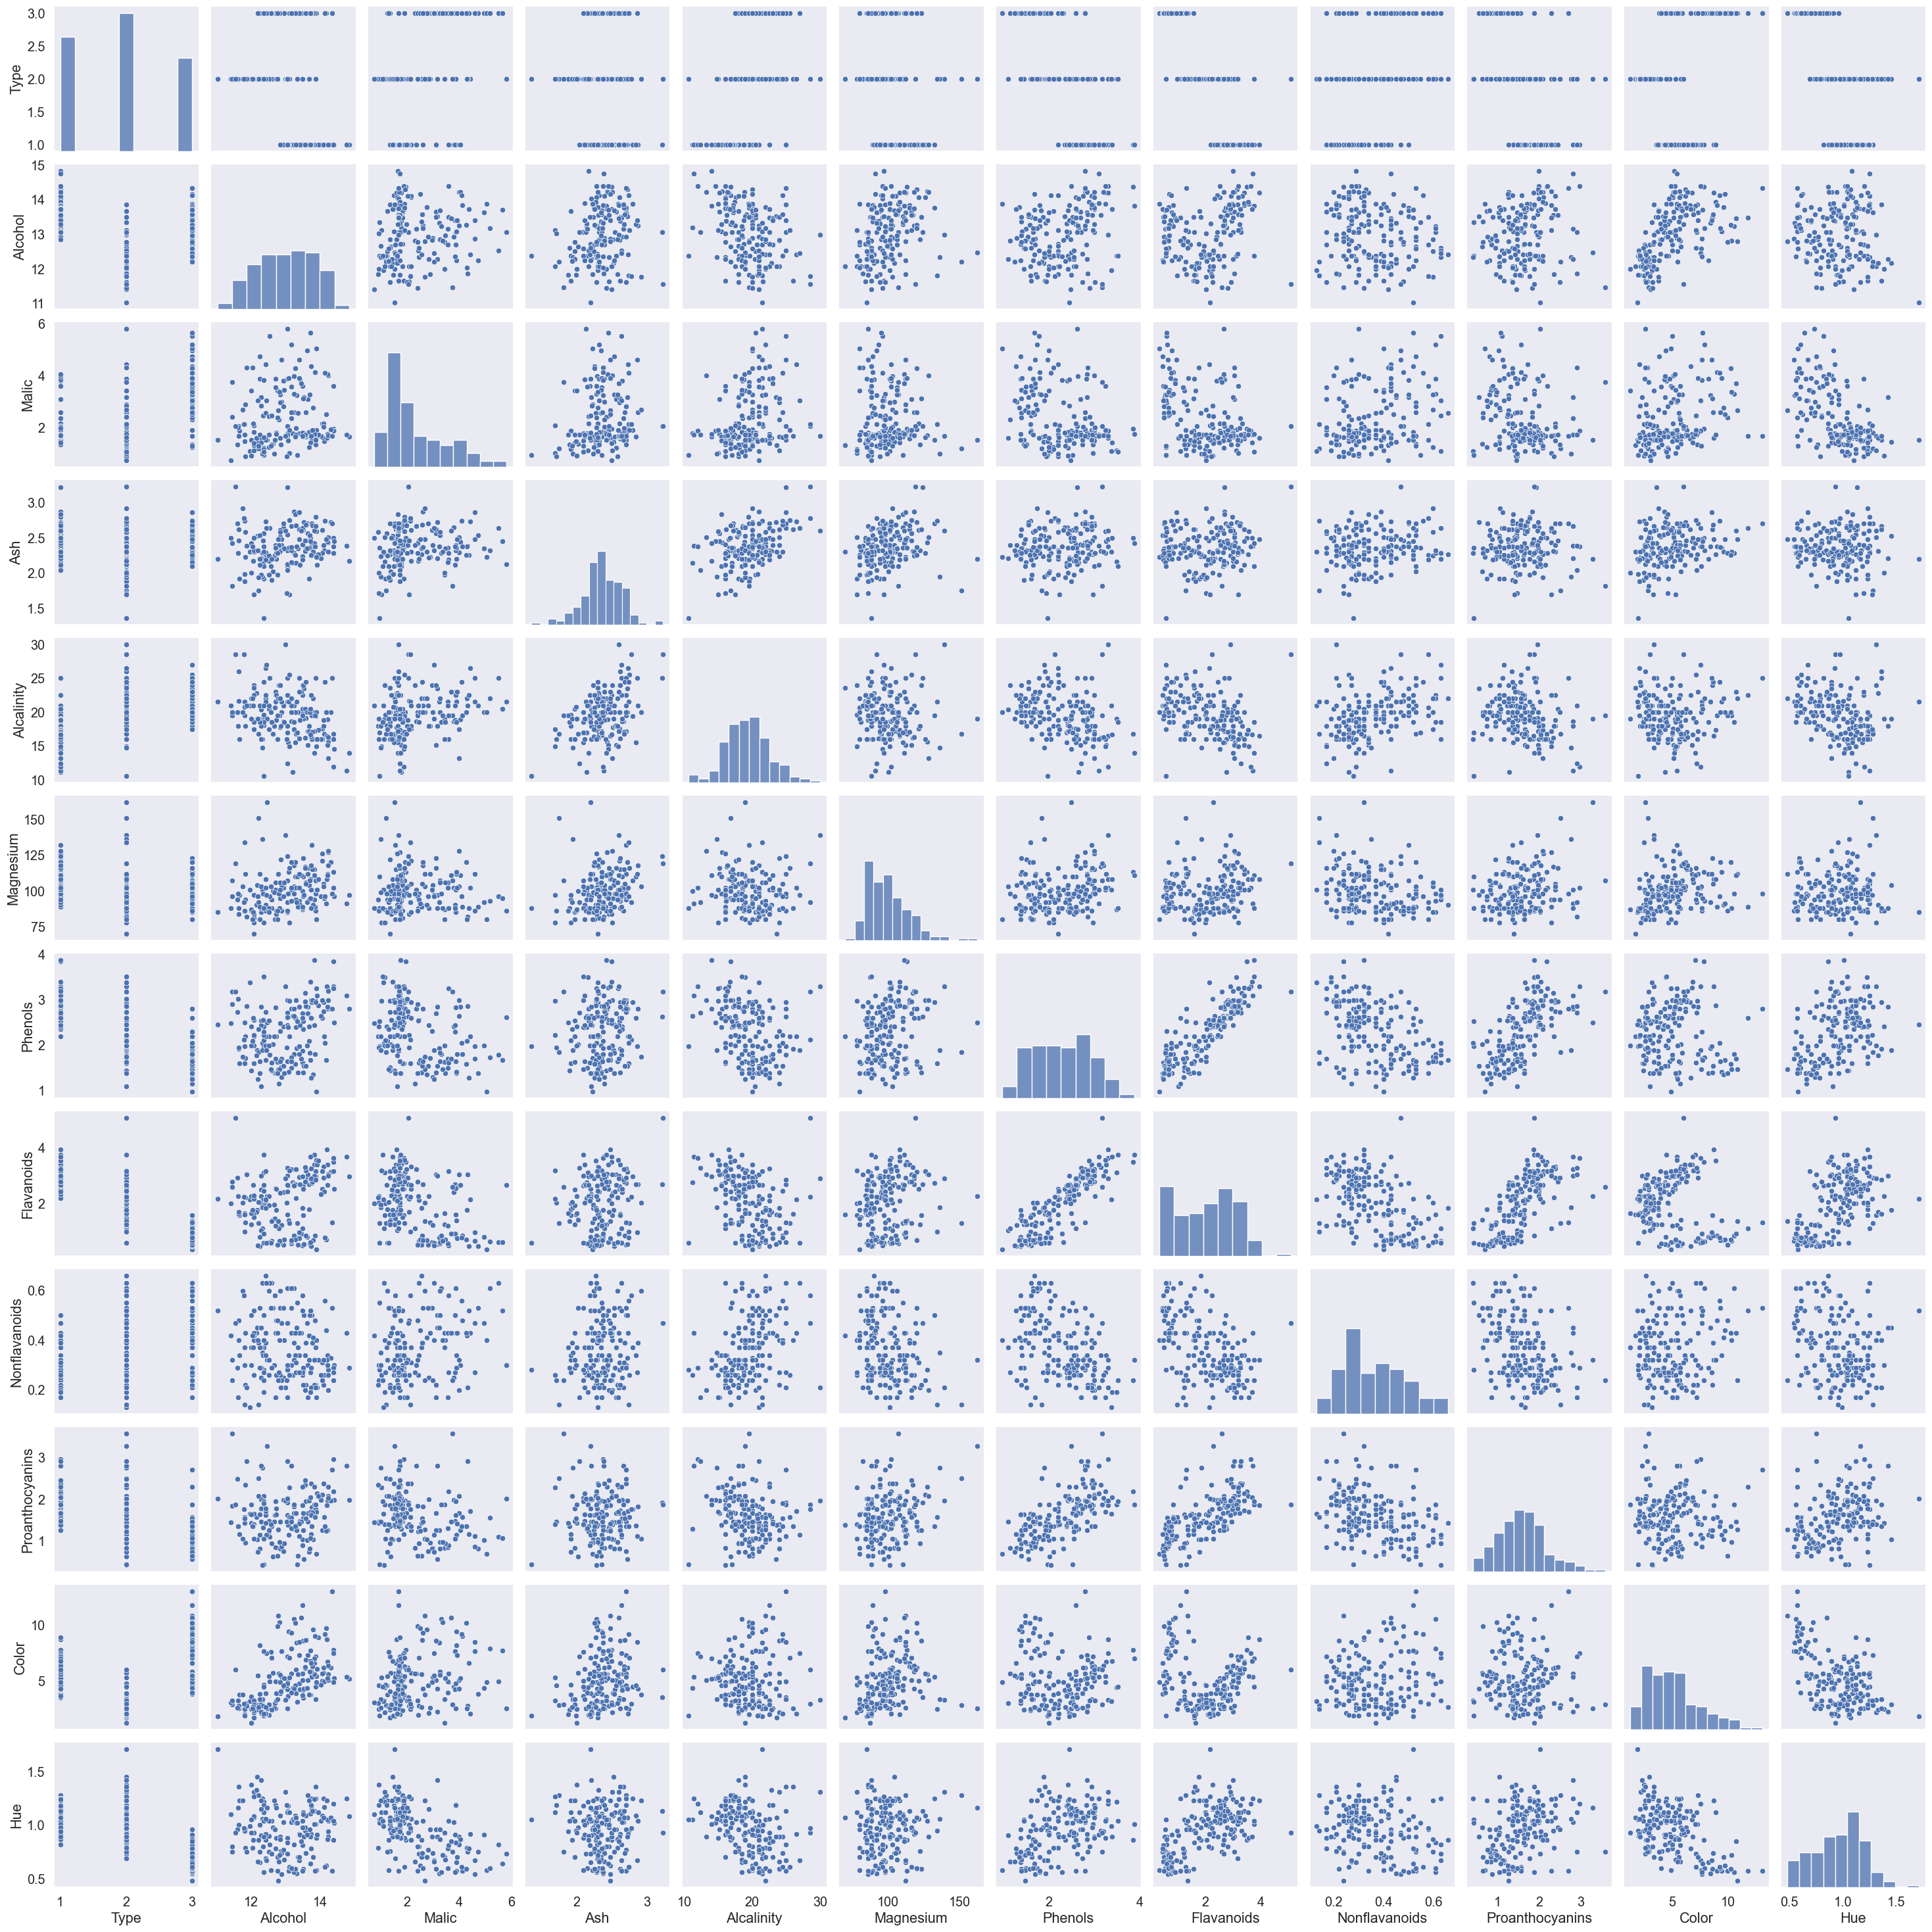

In [53]:
sns.pairplot(df.iloc[:,0:12])

In [54]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

# NORMALIZATION

In [55]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)
df_norm=norm_fun(df.iloc[:,1:])
print(df_norm)

      Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    0.842105  0.191700  0.572193    0.257732   0.619565  0.627586   
1    0.571053  0.205534  0.417112    0.030928   0.326087  0.575862   
2    0.560526  0.320158  0.700535    0.412371   0.336957  0.627586   
3    0.878947  0.239130  0.609626    0.319588   0.467391  0.989655   
4    0.581579  0.365613  0.807487    0.536082   0.521739  0.627586   
..        ...       ...       ...         ...        ...       ...   
173  0.705263  0.970356  0.582888    0.510309   0.271739  0.241379   
174  0.623684  0.626482  0.598930    0.639175   0.347826  0.282759   
175  0.589474  0.699605  0.481283    0.484536   0.543478  0.210345   
176  0.563158  0.365613  0.540107    0.484536   0.543478  0.231034   
177  0.815789  0.664032  0.737968    0.716495   0.282609  0.368966   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      0.573840       0.283019         0.593060  0.372014  0.455285  0.970696 

In [56]:
from sklearn.preprocessing import StandardScaler
std_df=StandardScaler().fit_transform(df1)
std_df.shape

(178, 14)

In [57]:
print(std_df)

[[ 1.51861254 -0.5622498   0.23205254 ...  1.84791957  1.01300893
  -1.72234737]
 [ 0.24628963 -0.49941338 -0.82799632 ...  1.1134493   0.96524152
  -1.70288581]
 [ 0.19687903  0.02123125  1.10933436 ...  0.78858745  1.39514818
  -1.68342426]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.48544548  0.28057537
   1.68342426]
 [ 0.20923168  0.22769377  0.01273209 ... -1.40069891  0.29649784
   1.70288581]
 [ 1.39508604  1.58316512  1.36520822 ... -1.42894777 -0.59516041
   1.72234737]]


# Using PCA for standardized data

In [58]:
from sklearn.decomposition import PCA
pca_std=PCA(random_state=14,n_components=3)
pca_std_df=pca_std.fit_transform(std_df)

In [59]:
print(pca_std_df)

[[ 3.72381616e+00 -1.44747583e+00 -1.53274368e-01]
 [ 2.73498740e+00  3.34165765e-01 -2.07971676e+00]
 [ 2.94483965e+00 -1.03358257e+00  9.79570476e-01]
 [ 4.09414384e+00 -2.76234374e+00 -1.23540855e-01]
 [ 1.55042891e+00 -8.67267165e-01  1.91557013e+00]
 [ 3.45822120e+00 -2.12531028e+00 -6.45206915e-01]
 [ 2.90939754e+00 -1.17554259e+00 -1.02314974e+00]
 [ 2.54468161e+00 -1.60848342e+00  5.30101451e-02]
 [ 2.94849943e+00 -9.19109780e-01 -1.79132612e+00]
 [ 3.13847933e+00 -7.92170221e-01 -9.69564145e-01]
 [ 3.80774858e+00 -1.30737562e+00 -3.94789018e-01]
 [ 2.24205693e+00 -6.10460784e-01 -1.27558696e+00]
 [ 2.55372348e+00 -6.75802820e-01 -9.20417978e-01]
 [ 3.78383327e+00 -1.13522641e+00 -1.18538692e+00]
 [ 4.54743607e+00 -2.10386822e+00 -1.17966560e+00]
 [ 2.70520575e+00 -1.66362415e+00  1.49492809e-01]
 [ 2.55239674e+00 -2.32870091e+00  7.81570121e-01]
 [ 2.29468639e+00 -1.63191258e+00  7.30415498e-01]
 [ 3.82035128e+00 -2.52365680e+00 -4.75490830e-01]
 [ 2.44294514e+00 -1.06266409e+

In [60]:
pca_std_df.shape

(178, 3)

In [61]:
#eigen values
print(pca_std.singular_values_)

[31.22683282 21.08244212 16.0925681 ]


In [62]:
#variance containing in each formed PCA
print(pca_std.explained_variance_ratio_*100)

[39.12981893 17.83584935 10.3920846 ]


In [63]:
cum_variance=np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([39.12981893, 56.96566828, 67.35775288])

# KMeans clustering

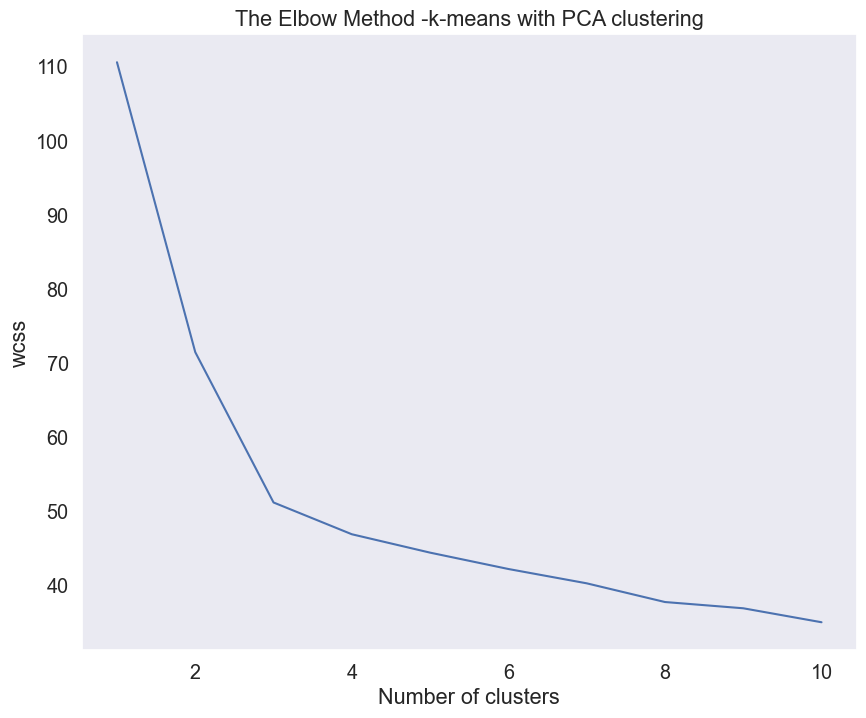

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method -k-means with PCA clustering')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [65]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df_norm)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Text(0, 0.5, 'Second principal component')

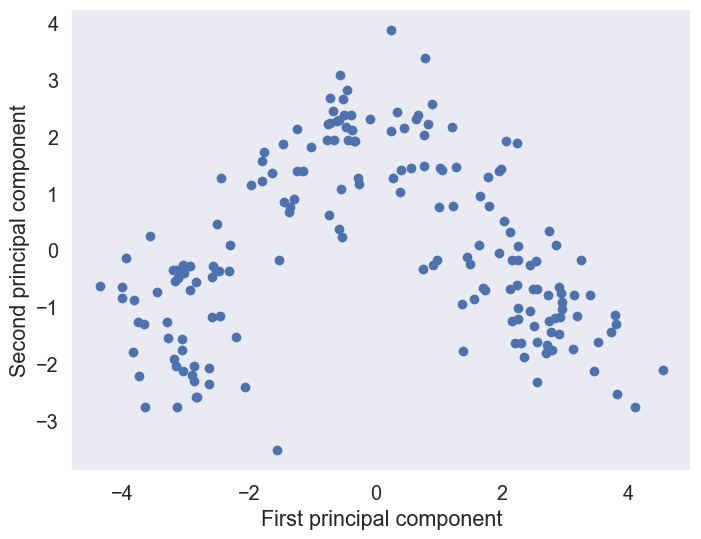

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(pca_std_df[:,0],pca_std_df[:,1],cmap='tab 10')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [67]:
pca_kmeans=pd.concat([df1.reset_index(drop=True),pd.DataFrame(df_norm)],axis=1)
pca_kmeans.columns.values[-3:]=['Component 1','Component 2','Component 3']
pca_kmeans['Segment kmeans PCA']=y_kmeans
print(pca_kmeans)

     Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color  ...   Phenols  Flavanoids  \
0             0.28             2.29   5.64  ...  0

# Hierarchial Clustering

In [73]:
print(pca_std_df)

[[ 3.72381616e+00 -1.44747583e+00 -1.53274368e-01]
 [ 2.73498740e+00  3.34165765e-01 -2.07971676e+00]
 [ 2.94483965e+00 -1.03358257e+00  9.79570476e-01]
 [ 4.09414384e+00 -2.76234374e+00 -1.23540855e-01]
 [ 1.55042891e+00 -8.67267165e-01  1.91557013e+00]
 [ 3.45822120e+00 -2.12531028e+00 -6.45206915e-01]
 [ 2.90939754e+00 -1.17554259e+00 -1.02314974e+00]
 [ 2.54468161e+00 -1.60848342e+00  5.30101451e-02]
 [ 2.94849943e+00 -9.19109780e-01 -1.79132612e+00]
 [ 3.13847933e+00 -7.92170221e-01 -9.69564145e-01]
 [ 3.80774858e+00 -1.30737562e+00 -3.94789018e-01]
 [ 2.24205693e+00 -6.10460784e-01 -1.27558696e+00]
 [ 2.55372348e+00 -6.75802820e-01 -9.20417978e-01]
 [ 3.78383327e+00 -1.13522641e+00 -1.18538692e+00]
 [ 4.54743607e+00 -2.10386822e+00 -1.17966560e+00]
 [ 2.70520575e+00 -1.66362415e+00  1.49492809e-01]
 [ 2.55239674e+00 -2.32870091e+00  7.81570121e-01]
 [ 2.29468639e+00 -1.63191258e+00  7.30415498e-01]
 [ 3.82035128e+00 -2.52365680e+00 -4.75490830e-01]
 [ 2.44294514e+00 -1.06266409e+

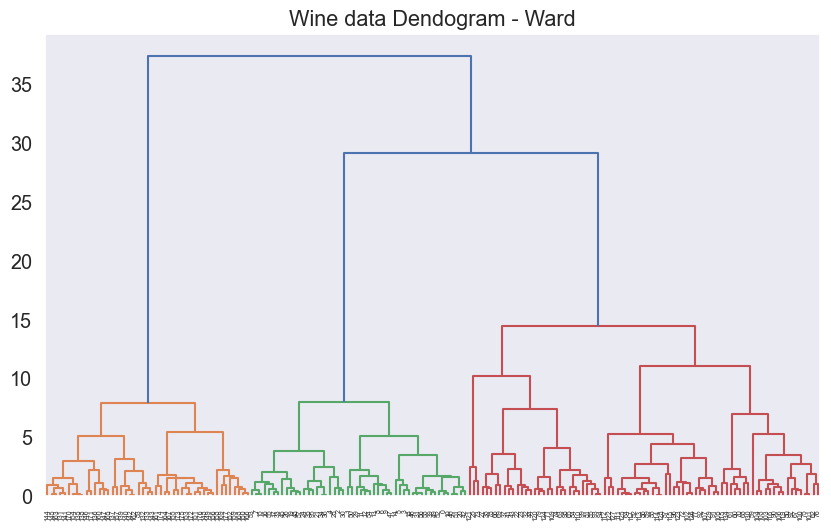

In [74]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,6))
plt.title("Wine data Dendogram - Ward")
dend=sch.dendrogram(sch.linkage(pca_std_df,method='ward'))